<a href="https://colab.research.google.com/github/karloxkronfeld/covid19/blob/master/PlotRace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pylab import *
from matplotlib import animation,rc
from IPython.display import HTML

In [0]:
covid=pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
datos=covid.iloc[:,[2,3,4]]
datos.columns=["pais","fecha","casos"]
fechas=sorted(datos.fecha.unique())
paises=datos.pais.unique()

In [0]:
df=pd.DataFrame(columns=fechas)
for i in range(len(paises)):
  pais=datos[datos.pais==paises[i]].drop("pais",axis=1).set_index("fecha").T.rename(index={"casos":paises[i]})
  df=df.append(pais)
df=df.fillna(0)
df=df.sort_values(df.columns[-1],ascending=False)

In [0]:
  aux=pd.DataFrame(columns=["numero"],index=fechas)
  aux["numero"]=range(0,len(aux))

In [51]:
df.iloc[1:30,range(0,int(aux.loc["2020-05-01"]))].T.iloc[:,[0,1]]

United States  Brazil
2019-12-31              0       0
2020-01-01              0       0
2020-01-02              0       0
2020-01-03              0       0
2020-01-04              0       0
...                   ...     ...
2020-04-26         939053   58509
2020-04-27         965910   61888
2020-04-28         988451   66501
2020-04-29        1012583   71886
2020-04-30        1039909   78162

[122 rows x 2 columns]

In [0]:
def race(year):
  funcion=df.iloc[1:6,range(0,int(aux.loc[year]))].T
  ax[0,0].plot(funcion.iloc[:,[1]],color=[0,0,0])
  ax[1,0].plot(funcion.iloc[:,[2]],color=[.5,.5,.9])
  ax[0,1].plot(funcion.iloc[:,[3]],color=[1,.5,0])
  ax[1,1].plot(funcion.iloc[:,[4]],color=[1,0,.9])

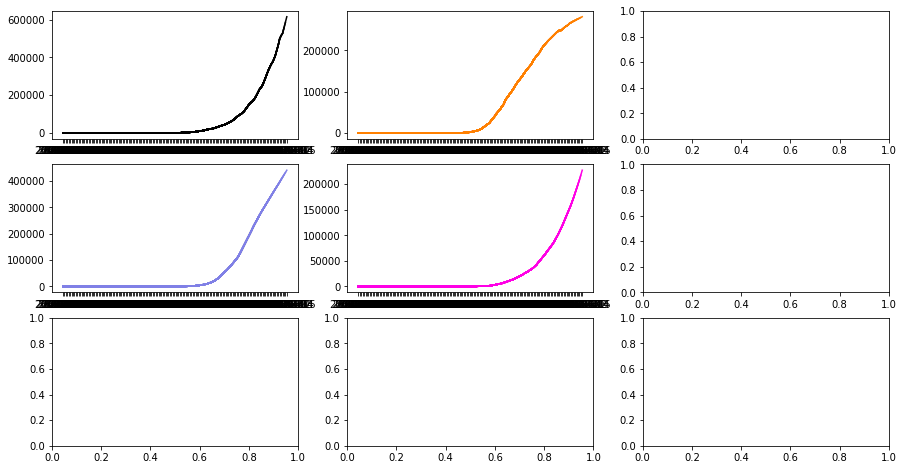

In [67]:
fig, ax = plt.subplots(2,2,figsize=(15, 8))
# race("2020-06-01")
animator=animation.FuncAnimation(fig,race,frames=fechas)
rc('animation', html='jshtml')
animator

In [0]:
# plt.figure(figsize=(15,8))
# race("2020-05-30")